# Comparing three classifiers
## On the autompg dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, auc

Start by importing the dataset. 

In [2]:
#importing the dataset
dataset = pd.read_csv('auto-mpg.csv')

Drop the rows that contain missing values or impute them. Return the first four values of the origin column in the dataset.

In [3]:
#Drop rows with missing values
dataset.dropna(inplace = True)
dataset["origin"].head()

0    1
1    1
2    1
3    1
4    1
Name: origin, dtype: int64

Insert the feature called as is_american. When we insert this feature, we can reduce the origin classes from 3 to only 2.

In [4]:
# Insert feature is_american because we want 2 way classification
# function to xform origin to american or non-american
is_am = lambda orig : (0,1) [orig == 1]
dataset["is_american"] = dataset["origin"].apply(is_am)

To verify, output all the values having the origin as 1. We have also specified a condition as is_american() that differentiates the cars that are American and non American.

In [5]:
print(dataset[dataset["origin"]==1])

     cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
392          4         151.0        90.0  2950.0          17.3          82   
393          4         140.0        86.0  2790.0          15.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     origin   mpg                   car name  is_american  
0  

### Data Visualization

We plot weight and mpg split on "is_american" feature. 

In [6]:
#Prepare weight series for plotting
wt_series_am = dataset[dataset["is_american"]==1].weight
wt_series_nonam = dataset[dataset["is_american"]==0].weight
wt_series = [list(wt_series_am)]+[list(wt_series_nonam)]
# Prepare mpg series for plotting
mpg_series_am = dataset[dataset["is_american"]==1].mpg
mpg_series_nonam = dataset[dataset["is_american"]==0].mpg
mpg_series = [list(mpg_series_am)]+[list(mpg_series_nonam)]

Plot the histograms of weight and mpg using matplotlib. We get various weight and mpg characteristics of American and non American cars.

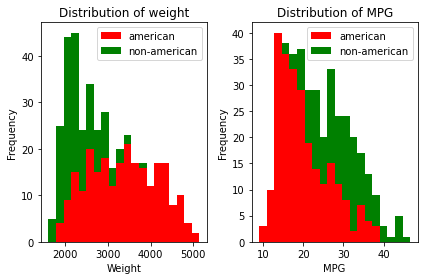

In [7]:
import matplotlib.pyplot as plt
#histogram of weight
num_bins = 20
fig, ((ax0,ax1)) = plt.subplots(nrows = 1, ncols = 2)
colors = ['red','green']
labels = ['american','non-american']
ax0.hist(wt_series, num_bins, histtype='bar', fill=True, density=False, stacked=True, color=colors, label=labels)
ax0.legend(prop={'size': 10})
ax0.set_xlabel("Weight")
ax0.set_ylabel("Frequency")
ax0.set_title("Distribution of weight")
#Histogram of mpg

ax1.hist(mpg_series, num_bins, histtype="bar", fill=True, density=False, stacked=True, color=colors, label=labels)
ax1.legend(prop={'size':10})
ax1.set_xlabel("MPG")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of MPG")
fig.tight_layout()
plt.show()

From the above histograms, we see that American cars are heavier and offer low mpg as compared to the non-American ones.

In [8]:
# Start importing modules for the classification step. 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold, StratifiedKFold

Assign the features and the label. The features are assigned as X and the label is assigned as y.

In [9]:
#Separate the features and the label field
X = dataset.drop(["is_american","origin","car name"], axis=1)
y = dataset["is_american"]  

In [10]:
#Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

We create all the three classifiers: logistic regression, naive bayes and knn.

In [11]:
# Creating the first classifier - Logistic Regressor
from sklearn.linear_model import LogisticRegression
classifier_lor = LogisticRegression(random_state=0, solver='liblinear')
#Create the second classifier - Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
classifier_nb = GaussianNB()
#Create the third classifier - knn
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5)

In [12]:
#create a 10 fold splitter
skf10 = StratifiedKFold(n_splits=10, shuffle = True, random_state = None)
print(skf10)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [13]:
# We train and test all the three classifiers using cross validation.
for train_index, test_index in skf10.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #train the log reg classifier
    classifier_lor.fit(X_train, y_train)
    y_pred_lor = classifier_lor.predict(X_test)
    #train the naive bayes classifier
    classifier_nb.fit(X_train, y_train)
    y_pred_nb = classifier_nb.predict(X_test)
    #train the knn classifier
    classifier_knn.fit(X_train, y_train)
    y_pred_knn = classifier_knn.predict(X_test)
    print("Accuracy score lor,nb,knn:", accuracy_score(y_test,y_pred_lor), accuracy_score(y_test,y_pred_nb),
    accuracy_score(y_test,y_pred_knn))

Accuracy score lor,nb,knn: 0.925 0.875 0.825
Accuracy score lor,nb,knn: 0.875 0.775 0.775
Accuracy score lor,nb,knn: 0.9230769230769231 0.7948717948717948 0.7948717948717948
Accuracy score lor,nb,knn: 0.8461538461538461 0.7948717948717948 0.7948717948717948
Accuracy score lor,nb,knn: 0.7948717948717948 0.6666666666666666 0.7948717948717948
Accuracy score lor,nb,knn: 0.9230769230769231 0.7948717948717948 0.9230769230769231
Accuracy score lor,nb,knn: 0.9230769230769231 0.8974358974358975 0.8974358974358975
Accuracy score lor,nb,knn: 0.9230769230769231 0.8717948717948718 0.8461538461538461
Accuracy score lor,nb,knn: 0.8205128205128205 0.6923076923076923 0.7692307692307693
Accuracy score lor,nb,knn: 0.8717948717948718 0.7948717948717948 0.7948717948717948


In [14]:
#Confusion matrix for all three classifiers.
from sklearn.metrics import confusion_matrix
cm_lor = confusion_matrix(y_test,y_pred_lor)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix for LOR:\n ",cm_lor)
print("confusion matrix for NB:\n", cm_nb)
print("confusion matrix for KNN:\n", cm_knn)

confusion matrix for LOR:
  [[12  3]
 [ 2 22]]
confusion matrix for NB:
 [[14  1]
 [ 7 17]]
confusion matrix for KNN:
 [[13  2]
 [ 6 18]]


In [15]:
#generate the ROC curve
from sklearn.metrics import roc_curve, auc
probs_lor = classifier_lor.predict_proba(X_test)
probs_nb = classifier_nb.predict_proba(X_test)
probs_knn = classifier_knn.predict_proba(X_test)

In [16]:
#create a color carousel and a linestyle carousel as generators for the ROC plot.
from itertools import cycle
plotcol = (col for col in cycle(['aqua','darkorange','cornflowerblue','navy','blue','green']))
lstyle = (style for style in cycle(['dashed','solid','dotted','dashdot']))

logreg auc:0.9583
nb auc:0.9083
knn auc:0.8931


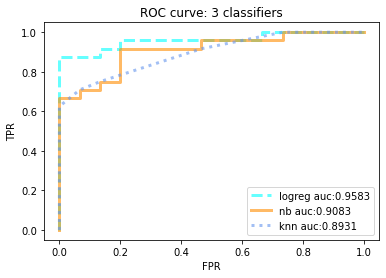

In [17]:
# We calculate TPR and FPR for each classifier and add its ROC curve to the plot.
for cfr_name,cfr_probs in {"logreg":probs_lor, "nb":probs_nb, "knn":probs_knn}.items():
    fpr, tpr,_ = roc_curve(y_test, cfr_probs[:,1]) # want probability of positive class
    roc_auc = auc(fpr,tpr)
    label_str = '%s auc:%0.4f' % (cfr_name, roc_auc)
    print(label_str)
    plt.plot(fpr, tpr, color=next(plotcol), linewidth=3, linestyle=next(lstyle), label = label_str, alpha=0.6)

plt.legend(loc='lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve: 3 classifiers")
plt.show()

#### Precision and Recall

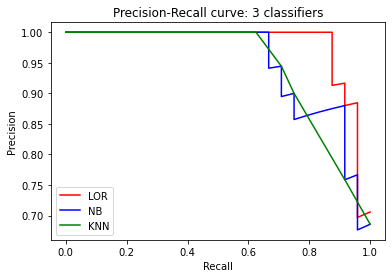

In [18]:
# precision and recall for all three classifiers.
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_lor, recall_lor, _ = precision_recall_curve(y_test, probs_lor[:,1])
precision_nb, recall_nb, _ = precision_recall_curve(y_test, probs_nb[:,1])
precision_knn, recall_knn, _ = precision_recall_curve(y_test, probs_knn[:,1])


plt.plot(recall_lor, precision_lor, color = 'r', label='LOR')
plt.plot(recall_nb, precision_nb, color = 'b', label = 'NB')
plt.plot(recall_knn, precision_knn, color = 'g', label = 'KNN')
plt.legend(loc='best')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve: 3 classifiers")
plt.show()

In [19]:
print(precision_lor, recall_lor)

[0.70588235 0.6969697  0.71875    0.74193548 0.76666667 0.79310345
 0.82142857 0.85185185 0.88461538 0.88       0.91666667 0.91304348
 0.95454545 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ] [1.         0.95833333 0.95833333 0.95833333 0.95833333 0.95833333
 0.95833333 0.95833333 0.95833333 0.91666667 0.91666667 0.875
 0.875      0.875      0.83333333 0.79166667 0.75       0.70833333
 0.66666667 0.625      0.58333333 0.54166667 0.5        0.45833333
 0.41666667 0.375      0.33333333 0.29166667 0.25       0.20833333
 0.16666667 0.125      0.08333333 0.04166667 0.        ]


In [20]:
# Recall Score
from sklearn.metrics import recall_score
recall_lor = recall_score(y_test, y_pred_lor, average='binary')
print('Recall lor: %.3f' % recall_lor)

Recall lor: 0.917
